In [1]:
using LinearAlgebra
using Statistics
using Random
using Plots
gr()

Plots.GRBackend()

In [2]:
eye(T::Type, n) = Diagonal{T}(I, n)
eye(n) = eye(Float64, n)

eye (generic function with 2 methods)

## 図4.1のプログラム

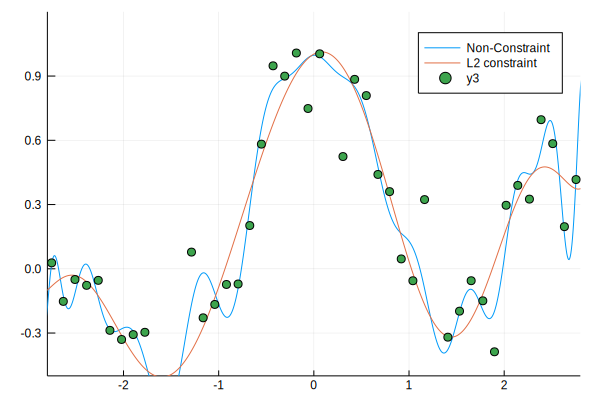

In [3]:
n = 50
N = 1000

x = range(-3, stop=3, length=n)
X = range(-3, stop=3, length=N)
pix = pi * x
y = sin.(pix) ./ (pix) + 0.1 * x + 0.2 * randn(n, 1)

p = ones(n, 31)
P = ones(N, 31)

for j in 1:15
    p[:, 2*j] = sin.(j / 2 * x)
    p[:, 2*j+1] = cos.(j / 2 * x)
    
    P[:, 2*j] = sin.(j / 2 * X)
    P[:, 2*j+1] = cos.(j / 2 * X)
end

t1 = p \ y
F1 = P * t1

t2 = (p * diagm(0 => reshape([ones(1, 11) zeros(1, 20)], (31)))) \ y
F2 = P * t2

plot(X, F1, xlim=(-2.8, 2.8), ylim=(-0.5, 1.2), label="Non-Constraint")
plot!(X, F2, label="L2 constraint")
plot!(x, y, st=:scatter)

## 図4.6のプログラム

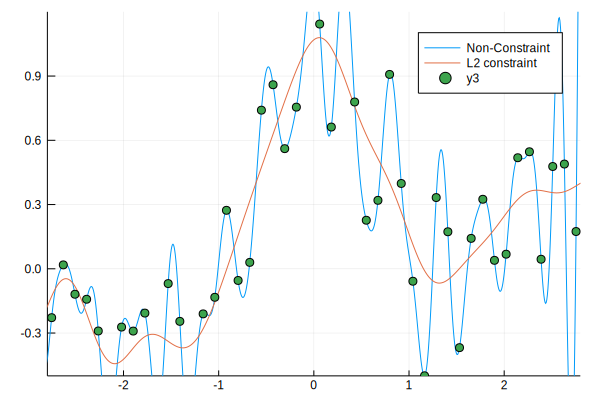

In [4]:
n = 50
N = 1000

x = range(-3, stop=3, length=n)
X = range(-3, stop=3, length=N)
pix = pi * x
y = sin.(pix) ./ (pix) + 0.1 * x + 0.2 * randn(n, 1)

x2 = x .^ 2
X2 = X .^ 2
hh = 2 * 0.3 ^ 2
l = 0.1

k = exp.(-(repeat(x2, 1, n) + repeat(x2', n, 1) - 2 * x * x') / hh)
K = exp.(-(repeat(X2, 1, n) + repeat(x2', N, 1) - 2 * X * x') / hh)

t1 = k \ y
F1 = K * t1

t2 = (k ^ 2 + l * eye(n)) \ (k * y)
F2 = K * t2

plot(X, F1, xlim=(-2.8, 2.8), ylim=(-0.5, 1.2), label="Non-Constraint")
plot!(X, F2, label="L2 constraint")
plot!(x, y, st=:scatter)

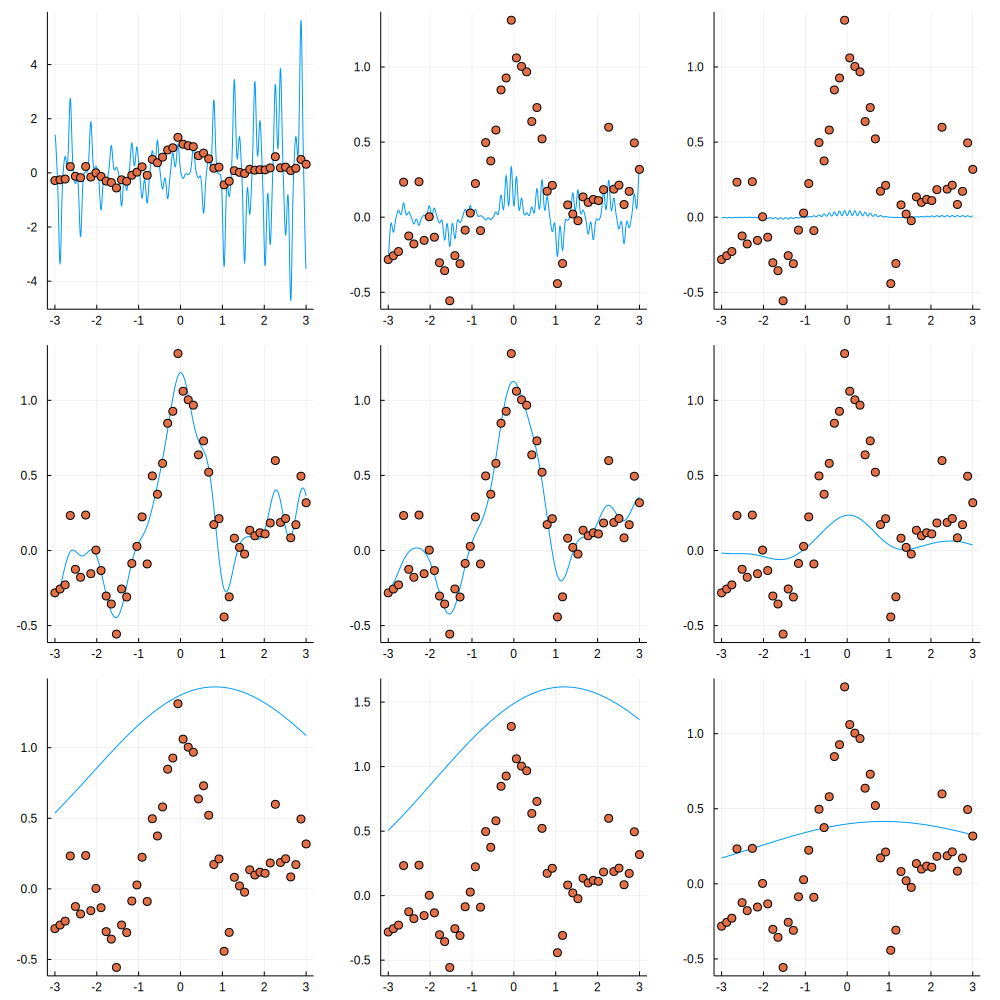

In [5]:
n = 50
N = 1000

x = range(-3, stop=3, length=n)
X = range(-3, stop=3, length=N)
pix = pi * x
y = sin.(pix) ./ (pix) + 0.1 * x + 0.2 * randn(n, 1)

x2 = x .^ 2
X2 = X .^ 2

k = exp.(-(repeat(x2, 1, n) + repeat(x2', n, 1) - 2 * x * x') / hh)
t1 = k \ y
F1 = K * t1

function kernel_model(h, l)
    hh = 2 * h ^ 2
    K = exp.(-(repeat(X2, 1, n) + repeat(x2', N, 1) - 2 * X * x') / hh)
    t2 = (k ^ 2 + l * eye(n)) \ (k * y)
    F2 = K * t2
    return F2
end

plot(X, kernel_model(0.03, 0.0001), label="L2 constraint")
p1 = plot!(x, y, st=:scatter)
plot(X, kernel_model(0.03, 0.1), label="L2 constraint2")
p2 = plot!(x, y, st=:scatter)
plot(X, kernel_model(0.03, 100), label="L2 constraint2")
p3 = plot!(x, y, st=:scatter)
plot(X, kernel_model(0.3, 0.0001), label="L2 constraint2")
p4 = plot!(x, y, st=:scatter)
plot(X, kernel_model(0.3, 0.1), label="L2 constraint2")
p5 = plot!(x, y, st=:scatter)
plot(X, kernel_model(0.3, 100), label="L2 constraint2")
p6 = plot!(x, y, st=:scatter)
plot(X, kernel_model(3, 0.0001), label="L2 constraint2")
p7 = plot!(x, y, st=:scatter)
plot(X, kernel_model(3, 0.1), label="L2 constraint2")
p8 = plot!(x, y, st=:scatter)
plot(X, kernel_model(3, 100), label="L2 constraint2")
p9 = plot!(x, y, st=:scatter)

plot(p1,p2,p3,p4,p5,p6,p7,p8,p9, layout=(3, 3), legend=false, size = (1000, 1000))

## 図4.12のプログラム

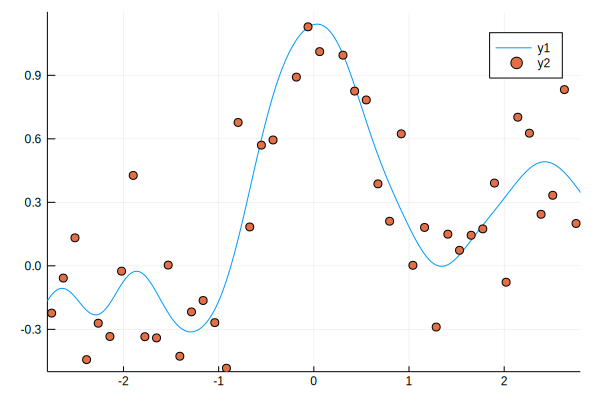

In [6]:
n = 50
N = 1000

x = range(-3, stop=3, length=n)
X = range(-3, stop=3, length=N)
pix = pi * x
y = sin.(pix) ./ (pix) + 0.1 * x + 0.2 * randn(n, 1)

x2 = x .^ 2
xx = repeat(x2, 1, n) + repeat(x2', n, 1) - 2 * x * x'

hhs = 2 * [0.03 0.3 3] .^ 2
ls = [0.0001 0.1 100]
m = 5

u = floor.(Int64, m * (0:(n-1)) / n) .+ 1
u = u[randperm(n)]

g = zeros(Float64, length(hhs), length(ls), m)

for hk in 1:length(hhs)
    hh = hhs[hk]
    k = exp.(-xx/hh)
    
    for i in 1:m
        ki = k[u .!= i, :]
        kc = k[u .== i, :]
        
        yi = y[u .!= i]
        yc = y[u .== i]
        
        for lk in 1:length(ls)
            l = ls[lk]
            t = (ki' * ki + l * eye(n)) \ (ki' * yi)
            fc = kc * t
            g[hk, lk, i] = mean((fc - yc) .^ 2)
        end
    end
end

value, ind = findmin(dropdims(mean(g, dims=3), dims=3))
L = ls[ind[2]]
HH = hhs[ind[1]]

K = exp.(-(repeat(X .^ 2, 1, n) + repeat(x2', N, 1) - 2 * X * x') / HH)
k = exp.(-xx / HH)
t = (k ^ 2 + L * eye(n)) \ (k * y)
F = K * t

plot(X, F, xlim=(-2.8, 2.8), ylim=(-0.5, 1.2))
plot!(x, y, st=:scatter)